In [35]:
import librosa
import sklearn
import torch

path = '/Users/rainism/Desktop/2023_AI_hub/2023_preliminary_kasr/task2_03.wav'
audio, sr = librosa.load(path, sr=16_000)
audio, _ = librosa.effects.trim(audio)

mfcc = librosa.feature.mfcc(
    y = audio, 
    sr=16_000, 
    n_mfcc=80, 
    n_fft=400, 
    hop_length=160
)


# def __getitem__(self, idx):
#     """ get feature vector & transcript """
#     # feature = self.parse_audio(
#     #     audio_path       = os.path.join(self.dataset_path, self.audio_paths[idx]), 
#     #     augment_method   = self.augment_methods[idx],
#     #     config           = self.config
#     #     ) # 해당하는 오디오를 불러옴.
#     # # 더 들어가면 modules/audio/core에서 load하는 메서드가 있는데, silence remove 하는 부분의 로직이 빈약함. -> 예선전 알고리즘으로 고도화 가능


#     feature = self.wav2image_tensor(
#         os.path.join(self.dataset_path, self.audio_paths[idx])
#         )


In [37]:
mfcc.shape

(80, 275)

In [39]:
a = torch.tensor(torch.randn([80, 200]))

/var/folders/jk/t5vx8lsx1fs7nd9c58w611bh0000gn/T/ipykernel_41793/1663077666.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(torch.randn([80, 200]))


In [42]:
[a, mfcc]

[tensor([[-0.4246, -1.1428, -0.2561,  ...,  0.4131, -0.2592,  1.3532],
         [ 1.6817,  0.5902, -1.2529,  ...,  0.1024, -0.2132,  3.0283],
         [ 0.3490, -0.8378, -3.1452,  ...,  0.2544,  1.2629,  0.1985],
         ...,
         [ 0.2649, -1.4679,  0.9914,  ...,  0.6834,  1.0636,  2.1448],
         [-1.1687,  0.5579,  1.1832,  ..., -0.8583, -2.0065, -1.7332],
         [-1.5953,  2.1462,  0.1580,  ...,  0.6206,  0.9479, -0.4071]]),
 array([[-5.9869073e+02, -6.0030975e+02, -6.0759351e+02, ...,
         -6.0116437e+02, -6.0620154e+02, -6.0000861e+02],
        [ 4.8689110e+01,  4.7551369e+01,  3.9544601e+01, ...,
          4.8724922e+01,  4.0832550e+01,  4.7100166e+01],
        [ 3.1241028e+01,  3.2752041e+01,  2.8117428e+01, ...,
          3.7916718e+01,  2.9243147e+01,  3.1241230e+01],
        ...,
        [-4.4360238e-01, -7.8902638e-01, -1.1124313e+00, ...,
         -8.4807551e-01, -1.1601156e+00, -1.1138356e+00],
        [-5.7074809e-01, -1.7839260e+00, -9.8635507e-01, ...,
   

In [1]:
import numpy as np
import sys, os

from core import load_audio



class AudioParser(object):
    """
    Provides inteface of audio parser.

    Note:
        Do not use this class directly, use one of the sub classes.

    Method:
        - **parse_audio()**: abstract method. you have to override this method.
        - **parse_transcript()**: abstract method. you have to override this method.
    """
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path

    def parse_audio(self, *args, **kwargs):
        raise NotImplementedError

    def parse_transcript(self, *args, **kwargs):
        raise NotImplementedError


# class SpectrogramParser(AudioParser):
#     """
#     Parses audio file into (spectrogram / mel spectrogram / mfcc) with various options.

#     Args:
#         transform_method (str): which feature to use (default: mel)
#         sample_rate (int): Sample rate of audio signal. (Default: 16000)
#         n_mels (int):  Number of mfc coefficients to retain. (Default: 40)
#         frame_length (int): frame length for spectrogram (ms) (Default : 20)
#         frame_shift (int): Length of hop between STFT windows. (ms) (Default: 10)
#         feature_extract_by (str): which library to use for feature extraction (default: librosa)
#         del_silence (bool): flag indication whether to delete silence or not (default: True)
#         input_reverse (bool): flag indication whether to reverse input or not (default: True)
#         normalize (bool): flag indication whether to normalize spectrum or not (default:True)
#         freq_mask_para (int): Hyper Parameter for Freq Masking to limit freq masking length
#         time_mask_num (int): how many time-masked area to make
#         freq_mask_num (int): how many freq-masked area to make
#         sos_id (int): start of sentence token`s identification
#         eos_id (int): end of sentence token`s identification
#         dataset_path (str): noise dataset path
#     """
#     VANILLA = 0           # Not apply augmentation
#     SPEC_AUGMENT = 1      # SpecAugment

#     def __init__(
#             self,
#             feature_extract_by: str = 'librosa',      # which library to use for feature extraction
#             sample_rate: int = 16000,                 # sample rate of audio signal.
#             n_mels: int = 80,                         # Number of mfc coefficients to retain.
#             frame_length: int = 20,                   # frame length for spectrogram
#             frame_shift: int = 10,                    # Length of hop between STFT windows.
#             input_reverse: bool = True,               # flag indication whether to reverse input or not
#             normalize: bool = False,                  # flag indication whether to normalize spectrum or not
#             transform_method: str = 'mel',            # which feature to use [mel, fbank, spect, mfcc]
#             freq_mask_para: int = 12,                 # hyper Parameter for Freq Masking to limit freq masking length
#             time_mask_num: int = 2,                   # how many time-masked area to make
#             freq_mask_num: int = 2,                   # how many freq-masked area to make
#             sos_id: int = 1,                          # start of sentence token`s identification
#             eos_id: int = 2,                          # end of sentence token`s identification
#             dataset_path: str = None,                 # noise dataset path
#             audio_extension: str = 'wav',             # audio extension
#     ) -> None:
#         super(SpectrogramParser, self).__init__(dataset_path)
#         self.input_reverse = input_reverse
#         self.normalize = normalize
#         self.sos_id = sos_id
#         self.eos_id = eos_id
#         self.spec_augment = SpecAugment(freq_mask_para, time_mask_num, freq_mask_num)
#         self.audio_extension = audio_extension

#         if transform_method.lower() == 'mel':
#             self.transforms = MelSpectrogram(sample_rate, n_mels, frame_length, frame_shift, feature_extract_by)
#         elif transform_method.lower() == 'mfcc':
#             self.transforms = MFCC(sample_rate, n_mels, frame_length, frame_shift, feature_extract_by)
#         elif transform_method.lower() == 'spect':
#             self.transforms = Spectrogram(sample_rate, frame_length, frame_shift, feature_extract_by)
#         elif transform_method.lower() == 'fbank':
#             self.transforms = FilterBank(sample_rate, n_mels, frame_length, frame_shift)
#         else:
#             raise ValueError("Unsupported feature : {0}".format(transform_method))

#     def parse_audio(self, 
#                     audio_path: str, 
#                     augment_method: int, 
#                     config) -> Tensor:
#         """
#         Parses audio.

#         Args:
#              audio_path (str): path of audio file
#              augment_method (int): flag indication which augmentation method to use.

#         Returns: feature_vector
#             - **feature_vector** (torch.FloatTensor): feature from audio file.
#         """
#         signal = load_audio(
#             audio_path, 
#             del_silence      = config.del_silence,
#             extension        = self.audio_extension,
#             remove_noise     = config.remove_noise,
#             audio_threshold  = config.audio_threshold,
#             min_silence_len  = config.min_silence_len,
#             ratio            = config.sample_rate,
#             make_silence_len = config.make_silence_len)

#         if signal is None:
#             # print("Audio is None : {0}".format(audio_path))
#             return None

#         feature = self.transforms(signal)

#         if self.normalize:
#             feature -= feature.mean()
#             feature /= np.std(feature)

#         # Refer to "Sequence to Sequence Learning with Neural Network" paper
#         if self.input_reverse: #???????????????????????????????????????
#             feature = feature[:, ::-1]
#             feature = FloatTensor(np.ascontiguousarray(np.swapaxes(feature, 0, 1)))
#         else:
#             feature = FloatTensor(feature).transpose(0, 1)

#         if augment_method == SpectrogramParser.SPEC_AUGMENT: #??????????????????????????????
#             feature = self.spec_augment(feature)

#         return feature

#     def parse_transcript(self, *args, **kwargs):
#         raise NotImplementedError
    
from torch import Tensor, FloatTensor


class FilterBank(object):
    """
    Create a fbank from a raw audio signal. This matches the input/output of Kaldi’s compute-fbank-feats

    Args:
        sample_rate (int): Sample rate of audio signal. (Default: 16000)
        n_mels (int):  Number of mfc coefficients to retain. (Default: 80)
        frame_length (int): frame length for spectrogram (ms) (Default : 20)
        frame_shift (int): Length of hop between STFT windows. (ms) (Default: 10)
    """
    def __init__(
            self,
            sample_rate: int = 16000,
            n_mels: int = 80,
            frame_length: int = 20,
            frame_shift: int = 10
    ) -> None:
        try:
            import torchaudio
        except ImportError:
            raise ImportError("Please install torchaudio `pip install torchaudio`")
        self.transforms = torchaudio.compliance.kaldi.fbank
        self.sample_rate = sample_rate
        self.n_mels = n_mels
        self.frame_length = frame_length
        self.frame_shift = frame_shift

    def __call__(self, signal):
        return self.transforms(
            Tensor(signal).unsqueeze(0),
            num_mel_bins=self.n_mels,
            frame_length=self.frame_length,
            frame_shift=self.frame_shift,
        ).transpose(0, 1).numpy()
    




aud = '/Users/rainism/Desktop/2023_AI_hub/2023_preliminary_kasr/task2_03.wav'
# aud = aud.set_frame_rate(16000)
# print(aud)
# signal = np.array(aud.get_array_of_samples()).astype('float32')
# print(signal.shape)
# print(signal)

signal = load_audio(
    aud,
    del_silence=True,
    extension='wav',
    remove_noise=True,
)

transform = FilterBank(
    16_000, 
    n_mels = 80, 
    frame_length = 20, 
    frame_shift = 10)

print(transform(signal))

/Users/rainism/opt/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]
 [-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]
 [-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]
 ...
 [-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]
 [-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]
 [-15.942385 -15.942385 -15.942385 ... -15.942385 -15.942385 -15.942385]]


In [30]:
transform(signal).shape

(80, 273)

In [26]:
import librosa
path = '/Users/rainism/Desktop/2023_AI_hub/2023_preliminary_kasr/task2_03.wav'

audio, sr = librosa.load(path, sr=16_000)
audio, _ = librosa.effects.trim(audio)

######### 하드 코딩 된 부분들
mfcc = librosa.feature.mfcc(
    y = audio, 
    sr=16_000, 
    n_mfcc=80, 
    n_fft=400, 
    hop_length=160
)


import sklearn
import torch

mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
mfcc = torch.tensor(mfcc, dtype=torch.float)


/Users/rainism/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/rainism/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [28]:
mfcc.shape

torch.Size([80, 275])

In [27]:
    def wav2image_tensor(self, path):
        audio, sr = librosa.load(path, sr=self.config.sample_rate)
        audio, _ = librosa.effects.trim(audio)

        ######### 하드 코딩 된 부분들
        mfcc = librosa.feature.mfcc(
            y = audio, 
            sr=self.config.sample_rate, 
            n_mfcc=self.config.n_mels, 
            n_fft=400, 
            hop_length=160
        )


        ########################3 하드 코딩 부분 변경 ##################
        # max_len = 1000

        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
        # def pad2d(a, i): return a[:, 0:i] if a.shape[1] > i else np.hstack(
        #     (a, np.zeros((a.shape[0], i-a.shape[1]))))
        # padded_mfcc = pad2d(mfcc, max_len).reshape( 
        #     1, self.config.n_mels, max_len)  # 채널 추가
        mfcc = torch.tensor(mfcc, dtype=torch.float)

        return mfcc

In [3]:
transform(signal).shape

(80, 273)

In [13]:
import librosa

mfcc1 = librosa.feature.mfcc(
            y = signal,
            sr=16_000)


(20, 86)

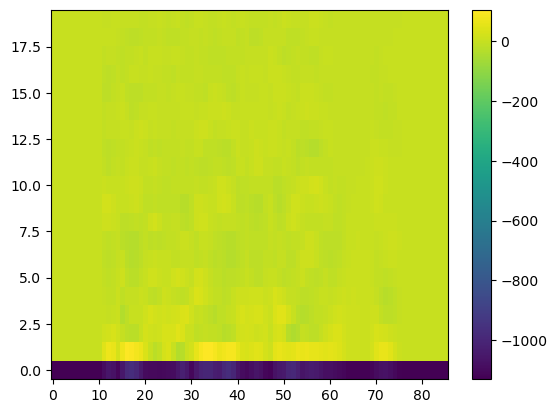

In [16]:
plt.imshow(mfcc1, interpolation="nearest", origin="lower", aspect="auto")
plt.colorbar()


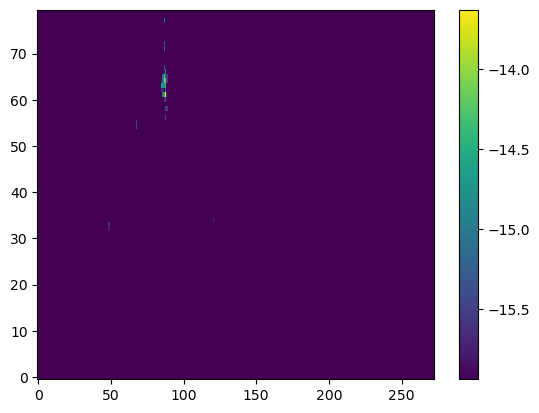

In [5]:
import matplotlib.pyplot as plt

plt.imshow(transform(signal), interpolation="nearest", origin="lower", aspect="auto")
plt.colorbar()